In [1]:
import pandas as pd
from IPython.display import display

df_C = pd.read_csv(r'C:\Users\sound\OneDrive\Desktop\main project\python project main\supervised classification type dataset\winequality-red.csv', sep=';')
display(df_C)
print(df_C)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [116]:
# Check for missing values

missing_values = df_C.isna().sum()
print(missing_values)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [117]:
from collections import Counter

import numpy as np

def detect_outliers(df_C,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df_C[c],25)
        # 3st quartile
        Q3 = np.percentile(df_C[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df_C[(df_C[c] < Q1 - outlier_step) | (df_C[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1.5) 
    
    return multiple_outliers

print("number of outliers detected --> ",len(df_C.loc[detect_outliers(df_C,df_C.columns[:-1])]))
df_C.loc[detect_outliers(df_C,df_C.columns[:-1])]


number of outliers detected -->  120


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
294,13.3,0.340,0.52,3.2,0.094,17.0,53.0,1.00140,3.05,0.81,9.500000,6
338,12.4,0.490,0.58,3.0,0.103,28.0,99.0,1.00080,3.16,1.00,11.500000,6
339,12.5,0.280,0.54,2.3,0.082,12.0,29.0,0.99970,3.11,1.36,9.800000,7
353,13.5,0.530,0.79,4.8,0.120,23.0,77.0,1.00180,3.18,0.77,13.000000,5
364,12.8,0.615,0.66,5.8,0.083,7.0,42.0,1.00220,3.07,0.73,10.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1228,5.1,0.420,0.00,1.8,0.044,18.0,88.0,0.99157,3.68,0.73,13.600000,7
1269,5.5,0.490,0.03,1.8,0.044,28.0,87.0,0.99080,3.50,0.82,14.000000,8
1270,5.0,0.380,0.01,1.6,0.048,26.0,60.0,0.99084,3.70,0.75,14.000000,6
1475,5.3,0.470,0.11,2.2,0.048,16.0,89.0,0.99182,3.54,0.88,13.566667,7


In [118]:
data_C = df_C.drop(detect_outliers(df_C,df_C.columns[:-1]),axis = 0).reset_index(drop = True)

In [119]:
data_C.describe(include="all")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000
mean,8.275930,0.526937,0.261873,2.415957,0.082278,15.267410,43.843813,0.996692,3.319554,0.641494,10.416148,5.643002
std,1.625404,0.174377,0.188784,1.063313,0.026046,9.592774,29.628152,0.001676,0.143039,0.132964,1.018823,0.798131
min,4.600000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.320000,0.610000,10.200000,6.000000
75%,9.200000,0.640000,0.410000,2.600000,0.088500,21.000000,59.000000,0.997800,3.400000,0.710000,11.100000,6.000000
max,15.000000,1.330000,0.780000,13.900000,0.387000,54.000000,155.000000,1.001000,4.010000,1.560000,14.000000,8.000000


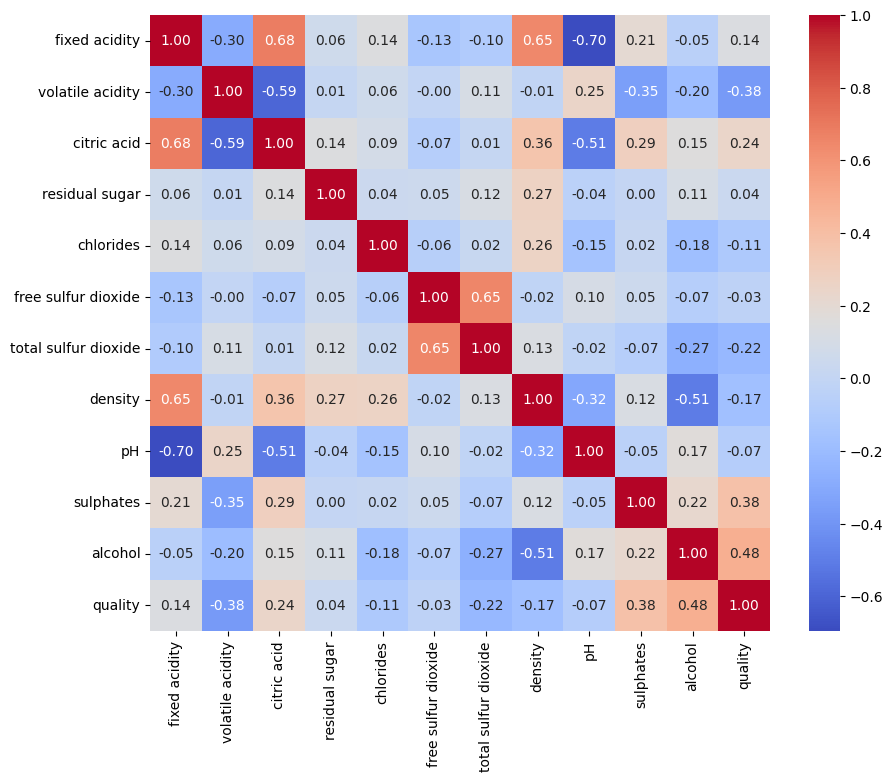

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = data_C.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

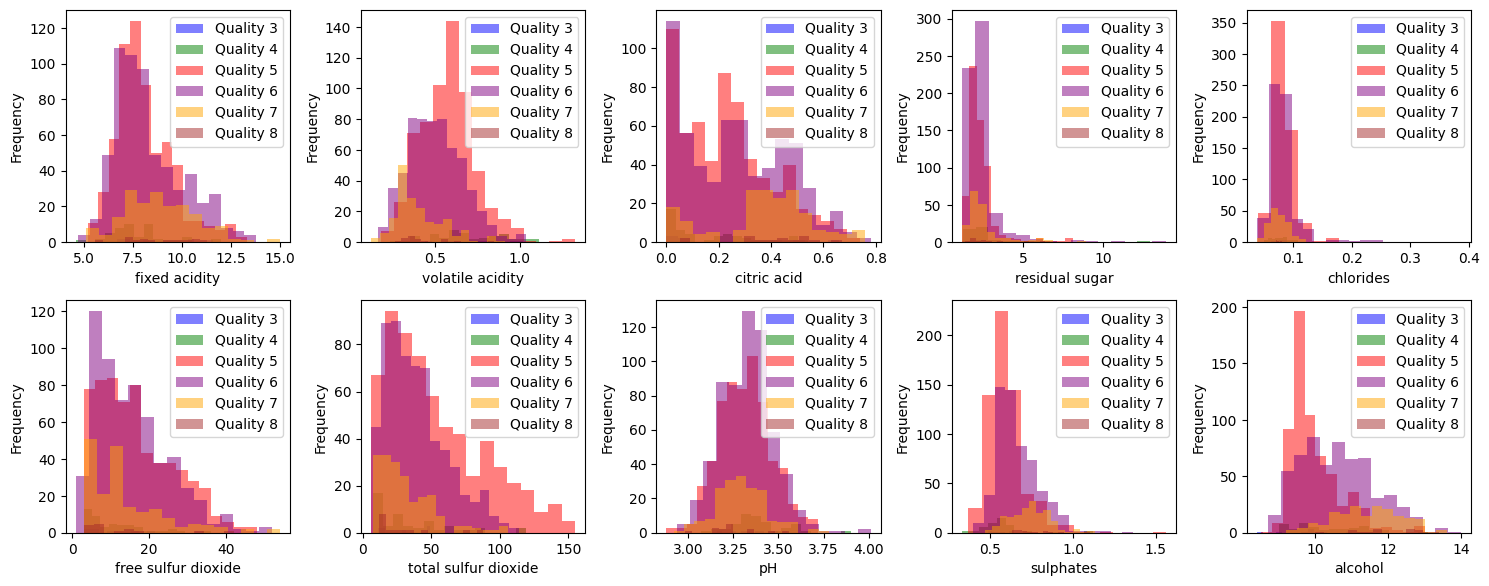

In [121]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the list of feature names, excluding 'density'
features = [col for col in data_C.columns if col != 'density' and col != 'quality']

# Define colors for each quality level
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink']

# Create subplots
fig, axes = plt.subplots(2, 5, figsize=(15, 6))  # 2 rows, 5 columns of subplots

for i, feature in enumerate(features):
    row = i // 5
    col = i % 5

    # Create histograms with different colors for each quality level
    for q, color in zip(range(3, 9), colors):
        axes[row, col].hist(data_C[data_C['quality'] == q][feature], alpha=0.5, color=color, label=f'Quality {q}', bins=15)

    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [122]:
import pandas as pd

result = data_C[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'quality']].groupby(["quality"], as_index=False).mean().sort_values(by="quality")


# Apply background gradient
styled_result = result.style.background_gradient("Reds")

# Display the styled DataFrame
styled_result


,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,3,8.575000,0.760000,0.213750,2.500000,0.123875,12.500000,28.250000,0.997910,3.356250,0.595000
1,4,7.781250,0.690000,0.156667,2.668750,0.078875,11.041667,34.750000,0.996551,3.389167,0.571042
2,5,8.109807,0.575635,0.231608,2.372267,0.084318,16.027331,53.617363,0.996996,3.316543,0.593167
3,6,8.293355,0.501013,0.265698,2.373339,0.082022,15.384551,39.014950,0.996578,3.326080,0.664120
4,7,8.858696,0.402636,0.369674,2.610870,0.076266,13.771739,30.858696,0.996120,3.294511,0.741359
5,8,8.740000,0.426667,0.403333,2.693333,0.070400,12.400000,29.066667,0.995508,3.247333,0.762667


In [123]:
data_C.loc[data_C['quality'] <= 6.5, 'quality'] = 0
data_C.loc[data_C['quality'] > 6.5, 'quality'] = 1

In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split

feature_columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates']

X = data_C[feature_columns]
y = data_C['quality']

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the data
display('X_train: ')
display(X_train.head())
display('X_test: ')
display(X_test.head())
display('y_train: ')
display(y_train.head())
display('y_test: ')
display(y_test.head())

'X_train: '

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
405,9.2,0.630,0.21,2.7,0.097,29.0,65.0,0.9988,3.28,0.58
478,8.1,0.825,0.24,2.1,0.084,5.0,13.0,0.9972,3.37,0.77
598,10.8,0.400,0.41,2.2,0.084,7.0,17.0,0.9984,3.08,0.67
1178,7.1,0.460,0.20,1.9,0.077,28.0,54.0,0.9956,3.37,0.64
528,11.9,0.580,0.58,1.9,0.071,5.0,18.0,0.9980,3.09,0.63


'X_test: '

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
661,11.6,0.410,0.58,2.8,0.096,25.0,101.0,1.00024,3.13,0.53
274,7.6,0.620,0.32,2.2,0.082,7.0,54.0,0.99660,3.36,0.52
394,9.5,0.735,0.10,2.1,0.079,6.0,31.0,0.99860,3.23,0.56
218,8.2,0.600,0.17,2.3,0.072,11.0,73.0,0.99630,3.20,0.45
922,8.9,0.320,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55


'y_train: '

405     0
478     0
598     0
1178    0
528     0
Name: quality, dtype: int64

'y_test: '

661    0
274    0
394    0
218    0
922    0
Name: quality, dtype: int64

In [125]:
print('Shape of X-train:', X_train.shape)
print('Shape of X-test:', X_test.shape)
print('Shape of y-test:', y_train.shape)
print('Shape of y-test:', y_test.shape)

Shape of X-train: (1183, 10)
Shape of X-test: (296, 10)
Shape of y-test: (1183,)
Shape of y-test: (296,)


In [126]:
import collections
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Before smote --> ", collections.Counter(y_train))
print("After smote --> ", collections.Counter(y_resampled))

Before smote -->  Counter({0: 1022, 1: 161})
After smote -->  Counter({0: 1022, 1: 1022})


In [127]:
from sklearn.discriminant_analysis import StandardScaler

scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled) 
X_test = scaler.transform(X_test) 
results = []

KNeighborsClassifier Acc:  0.8445945945945946
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       258
           1       0.43      0.68      0.53        38

    accuracy                           0.84       296
   macro avg       0.69      0.78      0.72       296
weighted avg       0.88      0.84      0.86       296



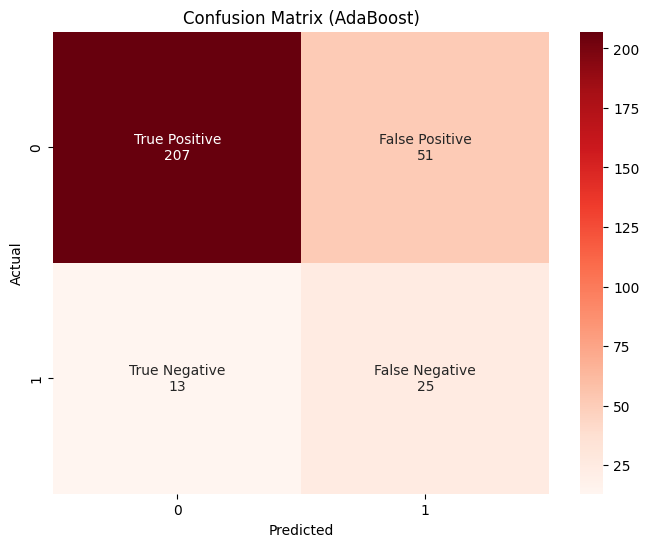

In [154]:
from sklearn.metrics import confusion_matrix, pair_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_resampled, y_resampled)
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

acc_knn = accuracy_score(y_test, y_pred)
score = knn.score(X_test, y_test)
results.append(acc_knn)

print("KNeighborsClassifier Acc: ", acc_knn)
report = classification_report(y_test, y_pred)
print(report)

labels = ['True Positive', 'False Positive', 'True Negative', 'False Negative']

annotations = np.empty_like(cm_ab, dtype=object)

# Fill the array with the annotations
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{labels[i*2 + j]}\n{cm_ab[i, j]}'

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ab, annot=annotations, fmt='', cmap='Reds', xticklabels=ab_classifier.classes_, yticklabels=ab_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()

SVC Acc :  0.793918918918919
              precision    recall  f1-score   support

           0       0.95      0.81      0.87       258
           1       0.35      0.71      0.47        38

    accuracy                           0.79       296
   macro avg       0.65      0.76      0.67       296
weighted avg       0.87      0.79      0.82       296



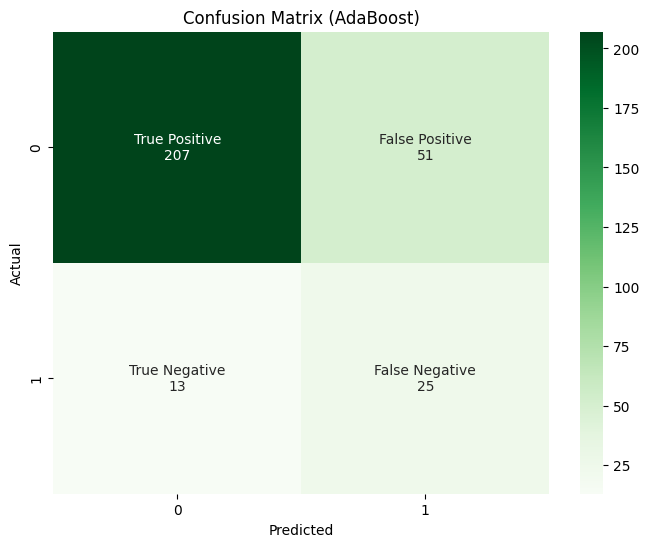

In [153]:
from sklearn.svm import SVC


svc = SVC()
svc.fit(X_resampled, y_resampled)
pred_svc = svc.predict(X_test)

cm_svc = confusion_matrix(y_test, pred_svc)
acc_svc = accuracy_score(y_test, pred_svc)
score = svc.score(X_test, y_test)
results.append(acc_svc)

print("SVC Acc : ", acc_svc)

report_svc = classification_report(y_test, pred_svc)
print(report_svc)

labels = ['True Positive', 'False Positive', 'True Negative', 'False Negative']

annotations = np.empty_like(cm_ab, dtype=object)

# Fill the array with the annotations
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{labels[i*2 + j]}\n{cm_ab[i, j]}'

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ab, annot=annotations, fmt='', cmap='Greens', xticklabels=ab_classifier.classes_, yticklabels=ab_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()

Decision Tree Classifier Accuracy:  0.8074324324324325
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       258
           1       0.36      0.63      0.46        38

    accuracy                           0.81       296
   macro avg       0.65      0.73      0.67       296
weighted avg       0.86      0.81      0.83       296



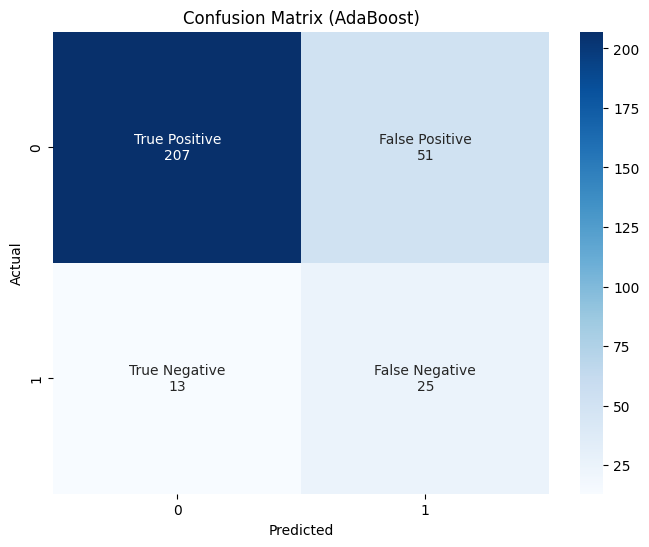

In [152]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_resampled, y_resampled)

# Predict using the trained model
pred_dt = dt_classifier.predict(X_test)

# Calculate confusion matrix and accuracy
cm_dt = confusion_matrix(y_test, pred_dt)
acc_dt = accuracy_score(y_test, pred_dt)

# Print accuracy
print("Decision Tree Classifier Accuracy: ", acc_dt)

# Generate the classification report
report = classification_report(y_test, pred_dt)
print(report)

labels = ['True Positive', 'False Positive', 'True Negative', 'False Negative']

annotations = np.empty_like(cm_ab, dtype=object)

# Fill the array with the annotations
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{labels[i*2 + j]}\n{cm_ab[i, j]}'

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ab, annot=annotations, fmt='', cmap='Blues', xticklabels=ab_classifier.classes_, yticklabels=ab_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()


RandomForestClassifier Acc :  0.8412162162162162
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       258
           1       0.42      0.66      0.52        38

    accuracy                           0.84       296
   macro avg       0.68      0.76      0.71       296
weighted avg       0.88      0.84      0.86       296



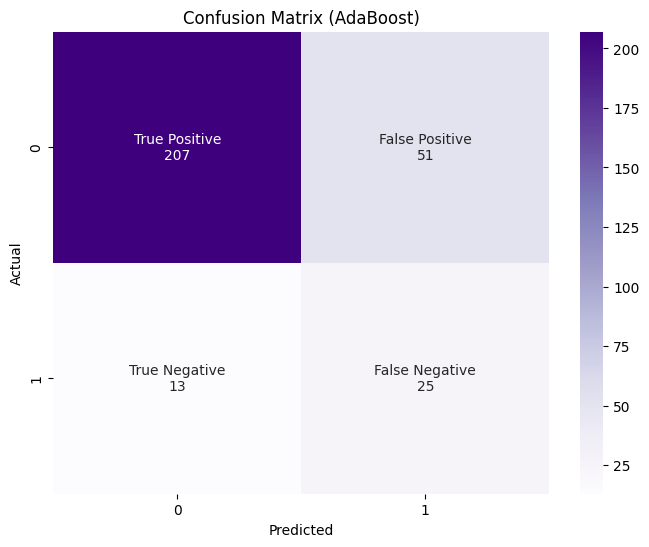

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_resampled, y_resampled)
y_pred_rf = rf_classifier.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)

acc_rf = accuracy_score(y_test, y_pred_rf)
score = rf_classifier.score(X_test, y_test)
results.append(acc_rf)

print("RandomForestClassifier Acc : ", acc_rf)

# Generate the classification report
report = classification_report(y_test, y_pred_rf)
print(report)

labels = ['True Positive', 'False Positive', 'True Negative', 'False Negative']

annotations = np.empty_like(cm_ab, dtype=object)

# Fill the array with the annotations
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{labels[i*2 + j]}\n{cm_ab[i, j]}'

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ab, annot=annotations, fmt='', cmap='Purples', xticklabels=ab_classifier.classes_, yticklabels=ab_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()

GradientBoostingClassifier Acc :  0.8513513513513513
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       258
           1       0.45      0.71      0.55        38

    accuracy                           0.85       296
   macro avg       0.70      0.79      0.73       296
weighted avg       0.89      0.85      0.86       296



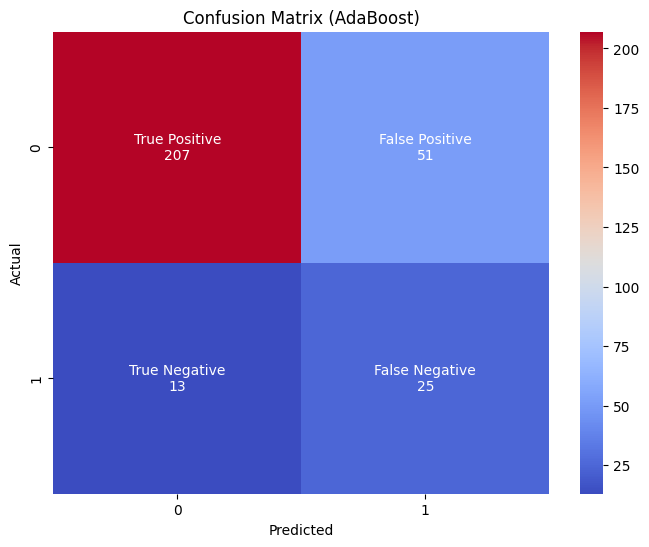

In [150]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the GradientBoostingClassifier
gbc_classifier = GradientBoostingClassifier(max_depth=6, random_state=2)
gbc_classifier.fit(X_resampled, y_resampled)
y_pred_gbc = gbc_classifier.predict(X_test)
cm_gbc = confusion_matrix(y_test, y_pred_gbc)

acc_gbc = accuracy_score(y_test, y_pred_gbc)
results.append(acc_gbc)

print("GradientBoostingClassifier Acc : ", acc_gbc)

# Generate the classification report
report = classification_report(y_test, y_pred_gbc)
print(report)

labels = ['True Positive', 'False Positive', 'True Negative', 'False Negative']

annotations = np.empty_like(cm_ab, dtype=object)

# Fill the array with the annotations
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{labels[i*2 + j]}\n{cm_ab[i, j]}'

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ab, annot=annotations, fmt='', cmap='coolwarm', xticklabels=ab_classifier.classes_, yticklabels=ab_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()


AdaBoost Classifier Accuracy:  0.7837837837837838
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       258
           1       0.33      0.66      0.44        38

    accuracy                           0.78       296
   macro avg       0.63      0.73      0.65       296
weighted avg       0.86      0.78      0.81       296



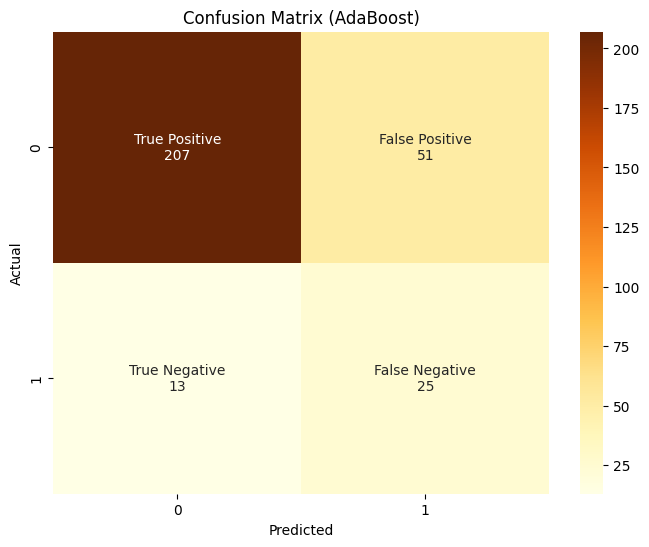

In [147]:
from sklearn.ensemble import AdaBoostClassifier

# Initialize and train the AdaBoostClassifier
ab_classifier = AdaBoostClassifier()
ab_classifier.fit(X_resampled, y_resampled)
pred_ab = ab_classifier.predict(X_test)
cm_ab = confusion_matrix(y_test, pred_ab)
acc_ab = accuracy_score(y_test, pred_ab)
results.append(acc_ab)
print("AdaBoost Classifier Accuracy: ", acc_ab)

# Generate the classification report
report_ab = classification_report(y_test, pred_ab)
print(report_ab)

labels = ['True Positive', 'False Positive', 'True Negative', 'False Negative']

annotations = np.empty_like(cm_ab, dtype=object)

# Fill the array with the annotations
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{labels[i*2 + j]}\n{cm_ab[i, j]}'

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ab, annot=annotations, fmt='', cmap='YlOrBr', xticklabels=ab_classifier.classes_, yticklabels=ab_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()


XgbBoost Classifier Accuracy:  0.7837837837837838
              precision    recall  f1-score   support

           0       0.94      0.80      0.87       258
           1       0.33      0.66      0.44        38

    accuracy                           0.78       296
   macro avg       0.63      0.73      0.65       296
weighted avg       0.86      0.78      0.81       296



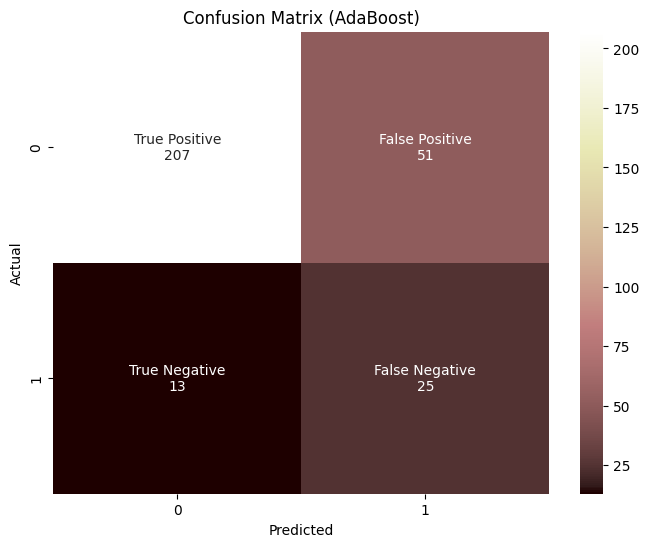

In [149]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the classifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_resampled, y_resampled)
pred_xgb = ab_classifier.predict(X_test)
cm_xgb = confusion_matrix(y_test, pred_xgb)
acc_xgb = accuracy_score(y_test, pred_xgb)
results.append(acc_xgb)
print("XgbBoost Classifier Accuracy: ", acc_xgb)

# Generate the classification report
report_xgb = classification_report(y_test, pred_xgb)
print(report_xgb)

labels = ['True Positive', 'False Positive', 'True Negative', 'False Negative']

annotations = np.empty_like(cm_ab, dtype=object)

# Fill the array with the annotations
for i in range(2):
    for j in range(2):
        annotations[i, j] = f'{labels[i*2 + j]}\n{cm_ab[i, j]}'

plt.figure(figsize=(8, 6))
sns.heatmap(cm_ab, annot=annotations, fmt='', cmap='pink', xticklabels=ab_classifier.classes_, yticklabels=ab_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (AdaBoost)')
plt.show()


In [139]:
from collections import Counter

import numpy as np


new_data = {
    'fixed acidity': [5, 5.7, 5.9, 8, 8.4, 7, 9, 7.2, 8, 8, 9.5, 7, 7.4, 7.8],
    'volatile acidity': [0.32, 0.38, 0.44, 0.5, 0.56, 0.28, 0.34, 0.4, 0.46, 0.52, 0.58, 0.36, 0.42, 0.48],
    'citric acid': [0.35, 0.4, 0.45, 0.5, 0.55, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.4, 0.45, 0.5],
    'residual sugar': [2.2, 2.4, 2.6, 2.8, 3, 2, 2.2, 2.4, 2.6, 2.8, 3, 2.2, 2.4, 2.6],
    'chlorides': [0.021, 0.025, 0.029, 0.033, 0.037, 0.019, 0.023, 0.027, 0.031, 0.035, 0.039, 0.021, 0.025, 0.029],
    'free sulfur dioxide': [33, 35, 37, 39, 41, 31, 33, 35, 37, 39, 41, 34, 36, 38],
    'total sulfur dioxide': [160, 175, 190, 205, 220, 155, 165, 180, 195, 210, 225, 170, 185, 200],
    'density': [0.997, 0.998, 0.999, 1, 1.001, 0.996, 0.997, 0.998, 0.999, 1, 1.001, 0.997, 0.998, 0.999],
    'pH': [3.3, 3.2, 3.1, 3, 2.9, 3.4, 3.3, 3.2, 3.1, 3, 2.9, 3.3, 3.2, 3.1],
    'sulphates': [0.65, 0.7, 0.75, 0.8, 0.85, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.7, 0.75, 0.8]
}

import pandas as pd
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

new_df = pd.DataFrame(new_data)
new_data_values = new_df.values

# Apply the same scaling parameters to the new data
new_data_scaled = scaler.transform(new_data_values)

new = pd.DataFrame(new_data_scaled)

gbc = GradientBoostingClassifier(max_depth= 6, random_state=2)
gbc.fit(X, y)

# Make predictions on the new data
y_pred_new = gbc.predict(new)

print("Predicted quality for new data:")
print(y_pred_new)



C:\Users\sound\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted quality for new data:
[0 0 1 1 1 1 0 0 1 1 1 0 0 1]


C:\Users\sound\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [155]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier

# Define your Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the Sequential Feature Selector
sfs1 = sfs(gb_classifier, 
           k_features=10,  # Set the desired number of features
           forward=True, 
           floating=False, 
           verbose=2,
           scoring=make_scorer(accuracy_score),  # Use an appropriate scoring metric for classification
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_resampled, y_resampled) 

# Get the selected feature indices
selected_feature_indices = sfs1.k_feature_idx_

# Get selected features using indices
selected_features = X_resampled[:, selected_feature_indices]

# Train Gradient Boosting classifier on selected features
gb_selected = GradientBoostingClassifier()
gb_selected.fit(selected_features, y_resampled)

# Predict on test set
y_pred_gb_selected = gb_selected.predict(X_test[:, selected_feature_indices])

# Calculate accuracy
accuracy_selected = accuracy_score(y_test, y_pred_gb_selected)

print(f'Selected Features Accuracy: {accuracy_selected}')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.1s finished

[2023-11-02 22:52:42] Features: 1/10 -- score: 0.8268325423078767[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   10.9s finished

[2023-11-02 22:52:53] Features: 2/10 -- score: 0.8449290474135864[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   12.5s finished

[2023-11-02 22:53:06] Features: 3/10 -- score: 0.8659547437556931[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

Selected Features Accuracy: 0.8006756756756757


In [157]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.metrics import make_scorer
from sklearn.ensemble import GradientBoostingClassifier

# Define your Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier()

# Define the Sequential Feature Selector for backward selection
sfs1 = sfs(gb_classifier, 
           k_features=1,  # Set the desired number of features (minimum)
           forward=False,  # Perform backward selection
           floating=False, 
           verbose=2,
           scoring=make_scorer(accuracy_score),  # Use an appropriate scoring metric for classification
           cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_resampled, y_resampled) 

# Get the selected feature indices
selected_feature_indices = sfs1.k_feature_idx_

# Get selected features using indices
selected_features = X_resampled[:, selected_feature_indices]

# Train Gradient Boosting classifier on selected features
gb_selected = GradientBoostingClassifier()
gb_selected.fit(selected_features, y_resampled)

# Predict on test set
y_pred_gb_selected = gb_selected.predict(X_test[:, selected_feature_indices])

# Calculate accuracy
accuracy_selected = accuracy_score(y_test, y_pred_gb_selected)

print(f'Selected Features Accuracy: {accuracy_selected}')


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   40.9s finished

[2023-11-02 23:00:06] Features: 9/1 -- score: 0.9095042907138406[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   32.6s finished

[2023-11-02 23:00:38] Features: 8/1 -- score: 0.9158564648353229[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   25.5s finished

[2023-11-02 23:01:04] Features: 7/1 -- score: 0.9114602809338894[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

Selected Features Accuracy: 0.7466216216216216


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s finished

[2023-11-02 23:02:00] Features: 1/1 -- score: 0.8268325423078767